## Defining the question.

### a) Specifying the data analytic question.

##### To check if the mean number of blue cars taken over the weekend is different from the mean number of bluecars taken on weekend.

###b) Defining the metric of success.
##### To be able to identify the day type that has the highest number of bluecars taken. 
##### To check whether there are other factors determining the number of bluecars taken


###d) Recording the experimental design
#####1)Importing libraries
#####2)Dataset loading
#####3)Dataset previewing
#####4)Dataset verification
#####5)Dataset cleaning
#####6)Exploatory Data Analysis
#####7)Univariate analysis of the data
#####8)Bivariate analysis of data
#####9)Hypothesis testing
#####10)Conclusion


###e) Data relevance

##### The dataset used for this analysis wasfrom a reliable source

# Uploading the data

### Importing the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
% matplotlib inline 

# Uploading the dataset

In [ ]:
# uploading our dataset

AutoDF = pd.read_csv('/content/autolib_daily_events_postal_code.csv', parse_dates = True)

# previewing
AutoDF.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# checking the information of our dataset

AutoDF.info()

# all the data types are okay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#cheking a summary of the statistics 

AutoDF.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# checking the details of the dataframe

AutoDF.shape

# the dataset has 16,085 rows and 12 columns


(16085, 12)

In [ ]:
#checking columns

AutoDF.columns

Index(['Postal code', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# change date column from object to date
AutoDF['date'] = pd.to_datetime(AutoDF['date']) 

#Setting the date column as an index column
AutoDF.set_index(['date'], inplace=True)


In [ ]:
# Checking data type has changed
AutoDF.dtypes

Postal code                int64
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Loading the column names descriptions

names = pd.read_excel('columns_explanation.xlsx')
names

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# Cleaning the dataset

#### Missing values

In [ ]:
# checking for missing values
AutoDF.isna().sum()

Postal code               0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

##### There are no missing values

#### Dropping unneccessary columns

In [ ]:
#dropping columns so that we only have those that relate to the bluecars\

#AutoDrop = pd.DataFrame(AutoDF.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 
#                        'Utilib_14_returned_sum', 'n_daily_data_points'],
#                       axis=1, inplace = True))


In [ ]:
# converting to a dataframe

AutoDrop = pd.DataFrame(AutoDF)

In [ ]:
# previewing

AutoDrop.head()

,Postal code,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
date,,,,,,,
2018-01-01,75001,0,weekday,110,103,22,20
2018-01-02,75001,1,weekday,98,94,23,22
2018-01-03,75001,2,weekday,138,139,27,27
2018-01-04,75001,3,weekday,104,104,25,21
2018-01-05,75001,4,weekday,114,117,18,20


In [ ]:
# Rename the dayOfWeek column name
AutoDrop.rename(columns={'dayOfWeek':'days_of_week'}, inplace=True) 
AutoDrop.head(3)

,Postal code,days_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
date,,,,,,,
2018-01-01,75001,0,weekday,110,103,22,20
2018-01-02,75001,1,weekday,98,94,23,22
2018-01-03,75001,2,weekday,138,139,27,27


In [ ]:
# checking the shape of the new dataframe\

AutoDrop.shape

# five columns were dropped

(16085, 7)

In [ ]:
AutoDrop.columns

Index(['Postal code', 'days_of_week', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# Editting the column names

AutoDrop.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['postal_code', 'days_of_week', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
#CHECKING THE NEW COLUMN NAMES
AutoDrop.columns

Index(['postal_code', 'days_of_week', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# previweing 

AutoDrop.head(1)

,postal_code,days_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,
2018-01-01,75001,0,weekday,110,103,22,20


In [ ]:
# Checking the data types

AutoDrop.dtypes


postal_code               int64
days_of_week              int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
slots_freed_sum           int64
slots_taken_sum           int64
dtype: object

In [ ]:
# checking for duplicates

AutoDrop.duplicated().sum()

443

In [ ]:
# dropping duplicates
AutoDrop.drop_duplicates()



,postal_code,days_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,
2018-01-01,75001,0,weekday,110,103,22,20
2018-01-02,75001,1,weekday,98,94,23,22
2018-01-03,75001,2,weekday,138,139,27,27
2018-01-04,75001,3,weekday,104,104,25,21
2018-01-05,75001,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...
2018-06-15,95880,4,weekday,15,10,0,0
2018-06-16,95880,5,weekend,19,19,0,0
2018-06-17,95880,6,weekend,33,35,0,0


In [ ]:
#Checking after dropping
AutoDrop.duplicated().sum()

443

In [ ]:
# checking the shape to see the new dataframe
AutoDrop.shape



(16085, 7)

In [ ]:
# previewing the dataframe

AutoDrop.head()

,postal_code,days_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,
2018-01-01,75001,0,weekday,110,103,22,20
2018-01-02,75001,1,weekday,98,94,23,22
2018-01-03,75001,2,weekday,138,139,27,27
2018-01-04,75001,3,weekday,104,104,25,21
2018-01-05,75001,4,weekday,114,117,18,20


In [ ]:
# checking columns
AutoDrop.columns

Index(['postal_code', 'days_of_week', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

## Outliers

### checking outliers

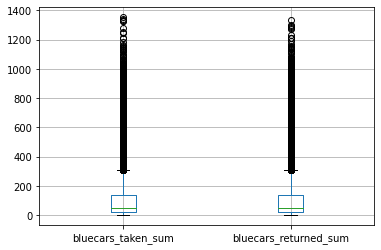

In [ ]:
#we plot a box plot to check for outliers in the number of bluecars taken and returned

AutoDrop.boxplot(column=['bluecars_taken_sum', 'bluecars_returned_sum'])

# there are outliers

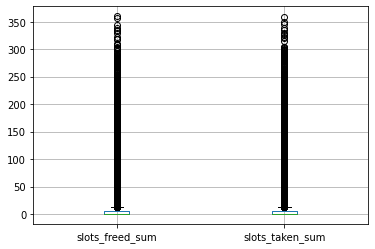

In [ ]:
#we plot a box plot to check for outliers in charging slots

AutoDrop.boxplot(column=['slots_freed_sum', 'slots_taken_sum'])

# there are outliers

#### Removing outliers

We will not remove outliers because the information is important in this study 

##Univariate analysis

###Checking the distribution of the bluecars taken and bluecars returned




In [ ]:
# First we convert the days of the week column into numerical data 

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

AutoDrop['days_of_week'] = AutoDrop['days_of_week'].apply(lambda x: days[x])

#Check if changes have applied
AutoDrop.head(3)

,postal_code,days_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,
2018-01-01,75001,Monday,weekday,110,103,22,20
2018-01-02,75001,Tuesday,weekday,98,94,23,22
2018-01-03,75001,Wednesday,weekday,138,139,27,27


In [ ]:
AutoDrop.dtypes

postal_code               int64
days_of_week             object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
slots_freed_sum           int64
slots_taken_sum           int64
dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

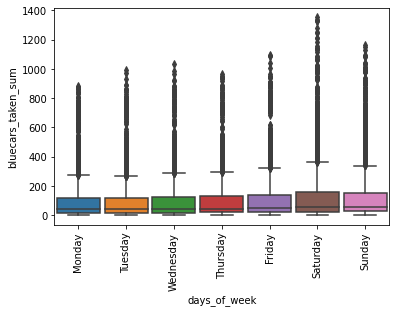

In [ ]:
#plotting a boxplot for bluecars_taken_sum 
# compared for each day of the week


sns.boxplot(y='bluecars_taken_sum', x='days_of_week',data=AutoDrop, width=0.9, 
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xticks(rotation = 90)

There were more blue cars taken on Saturdays and Sundays compared to other days.

The number of bluecars taken are least on Mondays and Thursdays with a rise from Monday to Wednesday, and a drop on Thursday. 

Thursday had the the least number of bluecars taken.

Saturdays had the highest number of bluecars.


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

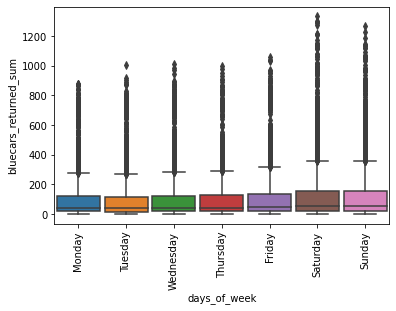

In [ ]:
#we check outliers for bluecars_returned_sum
# compared for each day of the week

sns.boxplot(y='bluecars_returned_sum', x='days_of_week', data=AutoDrop, width=0.9, 
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xticks(rotation = 90)

There are more blue cars returned on Saturdays and Sundays compared to other days.

The number of bluecars returned on Monday were the least.

The number of bluecars returned on Tuesday through to Friday were almost equal.

## Descriptive statistics

In [ ]:
# Description of the Blue cars returned sum 
AutoDrop['bluecars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64

In [ ]:
# Description of the bluecars_taken_sum 
AutoDrop['bluecars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

In [ ]:
# Description of the slots freed 
AutoDrop['slots_freed_sum'].describe()

count    16085.000000
mean        22.629033
std         52.120263
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        360.000000
Name: slots_freed_sum, dtype: float64

In [ ]:
# Description of the slots_taken_sum 
AutoDrop['slots_taken_sum'].describe()

count    16085.000000
mean        22.629282
std         52.146030
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        359.000000
Name: slots_taken_sum, dtype: float64

## Measures of Central Tendency

### Mean

In [ ]:
# Checking the mean of the dataset

print('Skew of bluecars taken is: ', AutoDrop['bluecars_taken_sum'].mean())
print('Skew of bluecars returned is: ', AutoDrop['bluecars_returned_sum'].mean())
print('Skew of charging slots released: ', AutoDrop['slots_freed_sum'].mean())
print('Skew of charging slots taken: ', AutoDrop['slots_taken_sum'].mean())

Skew of bluecars taken is:  125.92695057506994
Skew of bluecars returned is:  125.912713708424
Skew of charging slots released:  22.62903326080199
Skew of charging slots taken:  22.629281939695367


### Mode

In [ ]:
# Check the mode of the dataset
print('Mode of bluecars taken is: ', round(AutoDrop['bluecars_taken_sum'].mode(),0))
print('Mode of bluecars returned is: ', round(AutoDrop['bluecars_returned_sum'].mode(),0))
print('Mode of charging slots released is: ', round(AutoDrop['slots_freed_sum'].mode(),0))
print('Mode of charging slots taken is: ', round(AutoDrop['slots_taken_sum'].mode(),0))

Mode of bluecars taken is:  0    12
dtype: int64
Mode of bluecars returned is:  0    13
dtype: int64
Mode of charging slots released is:  0    0
dtype: int64
Mode of charging slots taken is:  0    0
dtype: int64


The most common number of bluecars taken was 12.

The most common number of bluecars returned was 13.

### Median

In [ ]:
# Check the median of the dataset
print('The median number of bluecars taken is: ', round(AutoDrop['bluecars_taken_sum'].median(),0))
print('The median number of bluecars returned is: ', round(AutoDrop['bluecars_returned_sum'].median(),0))
print('The median number of charging slots released: ', round(AutoDrop['slots_freed_sum'].median(),0))
print('The median number of charging slots taken: ', round(AutoDrop['slots_taken_sum'].median(),0))

The median number of bluecars taken is:  46.0
The median number of bluecars returned is:  46.0
The median number of charging slots released:  0.0
The median number of charging slots taken:  0.0


## Measures of dispersion

In [ ]:
# Checking the skewness of the dataset

print('Skew of bluecars taken is: ', AutoDrop['bluecars_taken_sum'].skew())
print('Skew of bluecars returned is: ', AutoDrop['bluecars_returned_sum'].skew())
print('Skew of charging slots released: ', AutoDrop['slots_freed_sum'].skew())
print('Skew of charging slots taken: ', AutoDrop['slots_taken_sum'].skew())

Skew of bluecars taken is:  2.4063548974959086
Skew of bluecars returned is:  2.412084978838923
Skew of charging slots released:  2.5974057870090994
Skew of charging slots taken:  2.5969043474634987


Positive skew shows that the data is spread on the right side of the distribution curve

In [ ]:
# Checking the kurtosis of the dataset

print('Kurtosis of bluecars taken is: ', AutoDrop['bluecars_taken_sum'].kurt())
print('Kurtosis of bluecars returned is: ', AutoDrop['bluecars_returned_sum'].kurt())
print('Kurtosis of charging slots released: ', AutoDrop['slots_freed_sum'].kurt())
print('Kurtosis of charging slots taken: ', AutoDrop['slots_taken_sum'].kurt())

Kurtosis of bluecars taken is:  6.172692305510042
Kurtosis of bluecars returned is:  6.1862880957582345
Kurtosis of charging slots released:  6.454514382612528
Kurtosis of charging slots taken:  6.442553073772169


Positive kurtosis shows that the data has steap slope distribution. This shows our data has outliers.

In [ ]:
#Calculate quantiles
quantiles = AutoDrop.quantile([0.25,0.5,0.75])
print(quantiles)

      postal_code  bluecars_taken_sum  bluecars_returned_sum  slots_freed_sum  \
0.25      91330.0                20.0                   20.0              0.0   
0.50      92340.0                46.0                   46.0              0.0   
0.75      93400.0               135.0                  135.0              5.0   

      slots_taken_sum  
0.25              0.0  
0.50              0.0  
0.75              5.0  


### Normality test

We do a normality test for the different features


In [ ]:
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


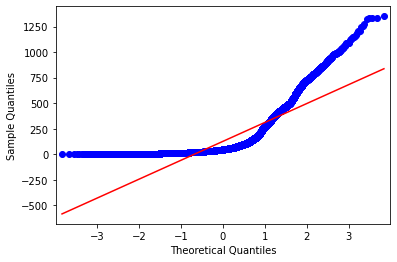

In [ ]:
#  normality test for bluecars taken
qqplot(AutoDrop['bluecars_taken_sum'], line='s')
pyplot.show()

The number of bluecars taken was not normally distributed

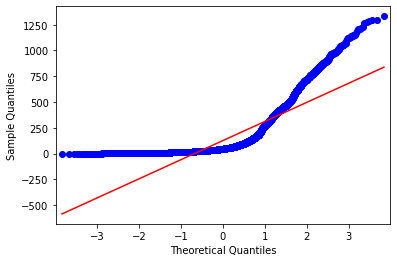

In [ ]:
#  normality test for bluecars returned
qqplot(AutoDrop['bluecars_returned_sum'], line='s')
pyplot.show()

The number of bluecars returned was not normally distributed

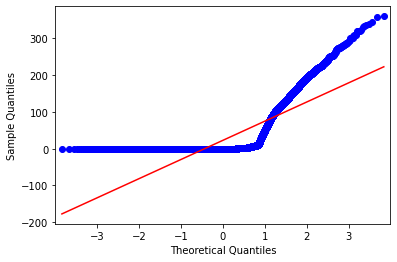

In [ ]:
#  normality test for slots freed
qqplot(AutoDrop['slots_freed_sum'], line='s')
pyplot.show()

The number of slots freed was not normally distributed

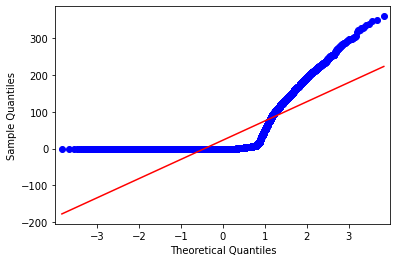

In [ ]:
#  normality test for slots taken
qqplot(AutoDrop['slots_taken_sum'], line='s')
pyplot.show()

The number of slots taken was not normally distributed

## Bivariate analysis

Checking the relationship between the sum of bluecars taken, blue cars returned, slots freed and slots taken

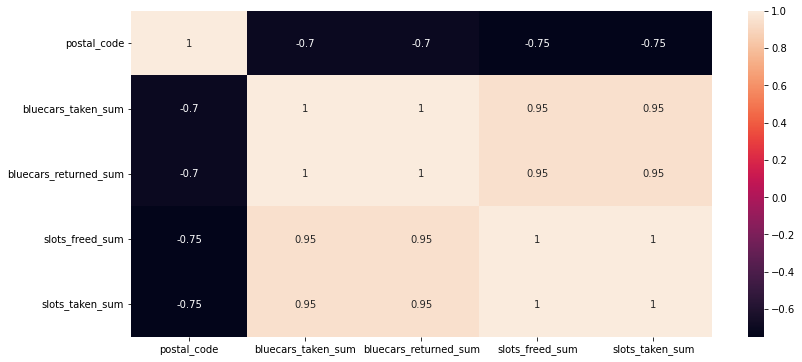

In [ ]:
#plotting the correlation matrix
fig, ax = plt.subplots(figsize=(13,6))

sns.heatmap(AutoDrop.corr(),annot=True)
plt.show()



Scatter plots to show the correlation of these features

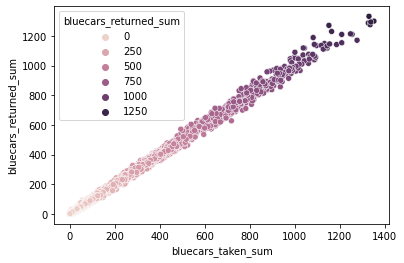

In [ ]:

# we plot a scatter plot
# checking correlation between bluecars taken and bluecars
sns.scatterplot(data = AutoDrop, x="bluecars_taken_sum", y="bluecars_returned_sum", hue="bluecars_returned_sum")

There is a strong correlation between the bluecars taken and the blue cars returned

This shows that there is a high demand for  bluecars and they are taken as soon as they are returned. 

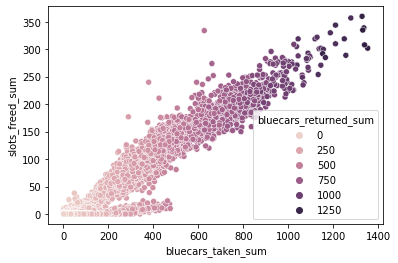

In [ ]:
# checking correlation between bluecars taken and slots freed

sns.scatterplot(data = AutoDrop, x="bluecars_taken_sum", y="slots_freed_sum", hue="bluecars_returned_sum")

There is a medium correlation between the bluecars taken and slots freed

This is because once a bluecar is taken, the charging slots are freed.

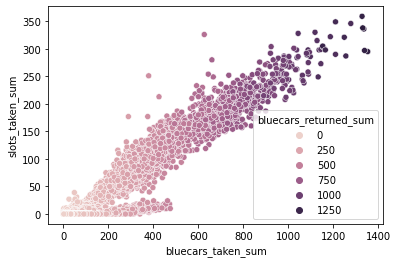

In [ ]:
# checking correlation between bluecars taken and slots taken

sns.scatterplot(data = AutoDrop, x="bluecars_taken_sum", y="slots_taken_sum", hue="bluecars_returned_sum")

There is a medium correlation between the slots taken and the bluecars taken. 

This shows that once a blue car is taken, there are more bluecars returned for charging.

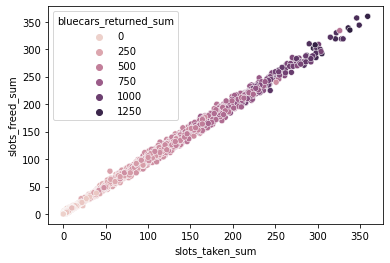

In [ ]:
# checking correlation between slots taken and slots freed


sns.scatterplot(data = AutoDrop, x="slots_taken_sum", y="slots_freed_sum", hue="bluecars_returned_sum")

There is a strong correlation between the number of slots taken and slots freed

This is an indication that the charging slots are always occupied.

#Sampling 

## Stratified sampling

###We will use stratified sampling for this analysis . We will create our strata based on day type.

In [ ]:
# checking the shape of the sampling frame

AutoDrop.shape

(16085, 7)

First, we create a new dataframe with columns bluecars taken, day of the week, day type and day name.

In [ ]:
# creating a new dataframe with specific columns names that we need

Bluecars_samp = AutoDrop[['days_of_week','day_type','bluecars_taken_sum']]


In [ ]:
# previewing
Bluecars_samp.head()

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-01-01,Monday,weekday,110
2018-01-02,Tuesday,weekday,98
2018-01-03,Wednesday,weekday,138
2018-01-04,Thursday,weekday,104
2018-01-05,Friday,weekday,114


In [ ]:
# checking the value count of the day type column

Bluecars_samp['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [ ]:
# we will Use groupby to create our strata
# we will create our strata based on day type column, this way , we will have two strata; weekday and weekend.
# later we will perfom simple random sampling for weekdays and weekends
# the size of the sample will be 10% of the population

In [ ]:
# Stratified sample
bluecars_strat = Bluecars_samp.groupby(['day_type'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.062))



In [ ]:
bluecars_strat.shape

(998, 3)

In [ ]:
# Check the stratified output
bluecars_strat.head()

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-04-09,Monday,weekday,35
2018-03-02,Friday,weekday,178
2018-04-10,Tuesday,weekday,7
2018-03-22,Thursday,weekday,48
2018-05-31,Thursday,weekday,58


Strata simple random sampling

In [ ]:
#Checking the shape of the new dataframe before stratification

Bluecars_samp.shape

(16085, 3)

In [ ]:
#value count for the dataframe before stratified sampling

Bluecars_samp['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [ ]:
#Checking the shape of the new dataframe after stratification

bluecars_strat.shape

(998, 3)

In [ ]:
#value count for the dataframe after stratified sampling

bluecars_strat['day_type'].value_counts()

weekday    1154
weekend     454
Name: day_type, dtype: int64

We can see that the sample is 10% the size of the population.

Our sampled dataframe is bluecars_strat

## Hypothesis statement

###Null Hypothesis: The mean number of blue cars taken over the weekend is the same as the mean number of vehicles taken during the weekdays


###Alternative hypothesis: The mean number of blue cars taken over the weekend is not equal to the mean number of vehicles taken during the weekdays



We will test the hypothesis on our sample 

We will set our confidence level to be 0.05 and use z score to get P-value

In [ ]:
# previewing the value count of the day name column

bluecars_strat['day_type'].value_counts()

weekday    1154
weekend     454
Name: day_type, dtype: int64

In [ ]:
# checking the shape of the sample

bluecars_strat.shape

(998, 3)

### Hypothesis testing

In [ ]:
# checking our population size
Bluecars_samp.shape

(16085, 3)

In [ ]:
# checking our sample size
bluecars_strat.shape

(998, 3)

We will do a Z-score hypothesis testing since our sample size is 998 which is more than 30 

### Population statistics

In [ ]:
#preview the population dataset

Bluecars_samp.head(3)

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-01-01,Monday,weekday,110
2018-01-02,Tuesday,weekday,98
2018-01-03,Wednesday,weekday,138


In [ ]:
# checking value count for population
Bluecars_samp['days_of_week'].value_counts()

Monday       2374
Tuesday      2363
Sunday       2274
Friday       2271
Wednesday    2268
Thursday     2268
Saturday     2267
Name: days_of_week, dtype: int64

In [ ]:
#checking the population distribution of bluecars taken on weekends

population_weekend = Bluecars_samp[Bluecars_samp.day_type == 'weekend']
population_weekend.head()

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-01-06,Saturday,weekend,187
2018-01-07,Sunday,weekend,180
2018-01-13,Saturday,weekend,224
2018-01-14,Sunday,weekend,193
2018-01-20,Saturday,weekend,217


In [ ]:
#checking the population distribution of bluecars taken on weekdays

population_weekdays = Bluecars_samp[Bluecars_samp.day_type == 'weekday']
population_weekdays.head()

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-01-01,Monday,weekday,110
2018-01-02,Tuesday,weekday,98
2018-01-03,Wednesday,weekday,138
2018-01-04,Thursday,weekday,104
2018-01-05,Friday,weekday,114


### Sample statistics

In [ ]:
 #preview our sample dataset
bluecars_strat.head(3)

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-01-11,Thursday,weekday,21
2018-02-08,Thursday,weekday,15
2018-02-13,Tuesday,weekday,11


In [ ]:
#checking value count for sample

bluecars_strat['days_of_week'].value_counts()

Thursday     245
Tuesday      238
Monday       234
Saturday     230
Wednesday    228
Sunday       224
Friday       209
Name: days_of_week, dtype: int64

In [ ]:
#checking the sample distribution of bluecars taken on weekends

sample_weekend = bluecars_strat[bluecars_strat.day_type == 'weekend']
sample_weekend.head()

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-06-17,Sunday,weekend,57
2018-03-18,Sunday,weekend,360
2018-04-21,Saturday,weekend,71
2018-06-17,Sunday,weekend,405
2018-01-14,Sunday,weekend,32


In [ ]:
#checking the sample distribution of bluecars taken on weekdays

sample_weekdays = bluecars_strat[bluecars_strat.day_type == 'weekday']
sample_weekdays.head()

,days_of_week,day_type,bluecars_taken_sum
date,,,
2018-01-11,Thursday,weekday,21
2018-02-08,Thursday,weekday,15
2018-02-13,Tuesday,weekday,11
2018-05-23,Wednesday,weekday,413
2018-02-19,Monday,weekday,35


### Finding the means 

In [ ]:
# calculating the population means

population_weekday_mean = population_weekdays['bluecars_taken_sum'].mean()
print('The mean number of bluecars taken during the weekdays is: ', population_weekday_mean)


population_weekend_mean = population_weekend['bluecars_taken_sum'].mean()
print('The mean of bluecars taken on weekends is: ', population_weekend_mean)

The mean number of bluecars taken during the weekdays is:  116.0286729036729
The mean of bluecars taken on weekends is:  151.09006826690157


In [ ]:
# calculating the Sample means

sample_weekday_mean = sample_weekdays['bluecars_taken_sum'].mean()
print('The mean number of bluecars taken during the weekdays is: ', sample_weekday_mean)


sample_weekend_mean = sample_weekend['bluecars_taken_sum'].mean()
print('The mean of bluecars taken on weekends is: ', sample_weekend_mean)

The mean number of bluecars taken during the weekdays is:  115.1949740034662
The mean of bluecars taken on weekends is:  137.96035242290748


There are more bluecars taken out on weekends, with mean, mean1 = 137.96035242290748 compared to those taken on week days, with mean, mean2 = 115.1949740034662 

In [ ]:
# calculating the Sample std

sample_weekday_std = sample_weekdays['bluecars_taken_sum'].std()
print('The mean number of bluecars taken during the weekdays is: ', sample_weekday_std)


sample_weekend_std = sample_weekend['bluecars_taken_sum'].std()
print('The mean of bluecars taken on weekends is: ', sample_weekend_std)

The mean number of bluecars taken during the weekdays is:  169.77094187970147
The mean of bluecars taken on weekends is:  215.42908200571935


## z-score statistics

In [ ]:
# calculating z_score to get p_value
from scipy import stats 
import math
import scipy.stats

Weekday Z score

In [ ]:
#calculating z score for weekdays

sample_size = 998
population_weekday_mean = 116.0286729036729
sample_weekday_mean = 115.1949740034662
sample_weekday_std = 169.77094187970147

z_weekday = (sample_weekday_mean  - population_weekday_mean) / (sample_weekday_std/ (math.sqrt(sample_size )))
print("z-score for weekday is: ", z_weekday)

z-score for weekday is:  -0.15513548263022944


Calculating the corresponding p value

In [ ]:
# being a two tailed test, we use * 2
print("p_value for weekdays is: ", scipy.stats.norm.sf(abs(z_weekday))*2)

p_value for weekdays is:  0.8767145097053693


Weekend z score

In [ ]:
#calculating z score for weekends
 
sample_size = 998
population_weekend_mean = 151.09006826690157
sample_weekend_mean = 137.96035242290748
sample_weekend_std = 215.42908200571935

z_weekend = (sample_weekend_mean  - population_weekend_mean) / (sample_weekend_std/ (math.sqrt(sample_size )))
print("z-score for weekend is: ", z_weekend)

z-score for weekend is:  -1.9253791606897754


Calculating the corresponding p value

In [ ]:
print("p_value for weekdays is: ", scipy.stats.norm.sf(abs(z_weekend))*2)

p_value for weekdays is:  0.05418194074598504


##Conclusion

The pvalue is more than 0.05 hence we fail to reject the null hypothesis.


We do not have enough evidence to deny that the mean number of bluecars taken during weekends is equal to the mean number of bluecars taken during week days. 

The day type has no significant impact on the number of bluecars being rented out